Notebook to tinker around with heuristically generating f0/loudness signals from MIDI.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def generate_twinkle(notes, length=1250):
    # returns twinkle in f0

    Msec = 1.1224653607
    Mthird = 1.259913999
    fourth = 1.3348494983
    fifth = 1.4983086479
    Msixth = 1.6817964644
    
    arrs = [np.linspace(base, base, 50),  # B
            np.linspace(base, base, 50),  # B
            np.linspace(base*fifth, base*fifth, 50),  # F#
            np.linspace(base*fifth, base*fifth, 50),  # F#
            np.linspace(base*Msixth, base*Msixth, 50),  # G#
            np.linspace(base*Msixth, base*Msixth, 50),  # G#
            np.linspace(base*fifth, base*fifth, 100),  # F#
            np.linspace(base*fourth, base*fourth, 50),  # E
            np.linspace(base*fourth, base*fourth, 50),  # E
            np.linspace(base*Mthird, base*Mthird, 50),  # D#
            np.linspace(base*Mthird, base*Mthird, 50),  # D#
            np.linspace(base*Msec, base*Msec, 50),  # C#
            np.linspace(base*Msec, base*Msec, 50),  # C#
            np.linspace(base, base, 100),  # B
    ]


    f0 = np.concatenate((arrs))

    return np.concatenate((f0, np.linspace(base, base, length - f0.shape[0]))), f0.shape[0]

def generate_loud(beats, length=1250, decay=True):
    arrs = []
    base = -50
    decay_rate = -0.25 # decays -1 per timestep/index
    notelength = 0.7
    for i, beat in enumerate(beats):
        if i == len(beats) - 1:
            arr = np.linspace(-100, -100, length - beat)
        else:
            next_beat = beats[i + 1]
            if decay:
                arr = np.linspace(base, base + decay_rate * (next_beat - beat), next_beat - beat)
            else:
                notelengthidx = int(notelength * (next_beat - beat))
                restlengthidx = (next_beat - beat) - notelengthidx
                l = [np.linspace(base, base, notelengthidx),
                     np.linspace(-100, -100, restlengthidx)]
                arr = np.concatenate(l)
        arrs.append(arr)
    return np.concatenate(arrs)
    
# in the notebook
#f0_hz, stopidx = generate_twinkle()
#loudness_db = generate_loud(decay=False)

In [11]:
def generate_loud(beats, length=1250, decay=True):
    arrs = []
    base = -50
    decay_rate = -0.25 # decays -1 per timestep/index
    #notelength = 0.7
    ld_arr = np.zeros((length))
    for i, beat in enumerate(beats):
        if i == len(beats) - 1:
            next_beat = length
        else:
            next_beat = beats[i + 1]
        ld_arr[beat:next_beat] = np.linspace(base, base + decay_rate * (next_beat - beat), next_beat - beat)
        #if decay:
        #    arr = np.linspace(base, base + decay_rate * (next_beat - beat), next_beat - beat)
        #else:
        #    notelengthidx = int(notelength * (next_beat - beat))
        #    restlengthidx = (next_beat - beat) - notelengthidx
        #    l = [np.linspace(base, base, notelengthidx),
        #         np.linspace(-100, -100, restlengthidx)]
        #    arr = np.concatenate(l)
        #arrs.append(arr)
    
    return ld_arr

In [12]:
beats = [0, 50, 100, 150, 200, 250, 300, 400, 450, 500, 550, 600, 650, 700, 800]
ld = generate_loud(beats)

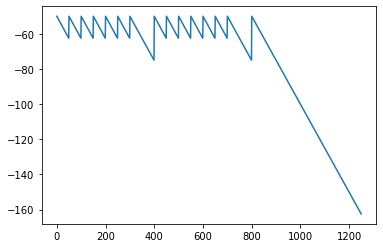

In [13]:
plt.plot(ld)